In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

0.0


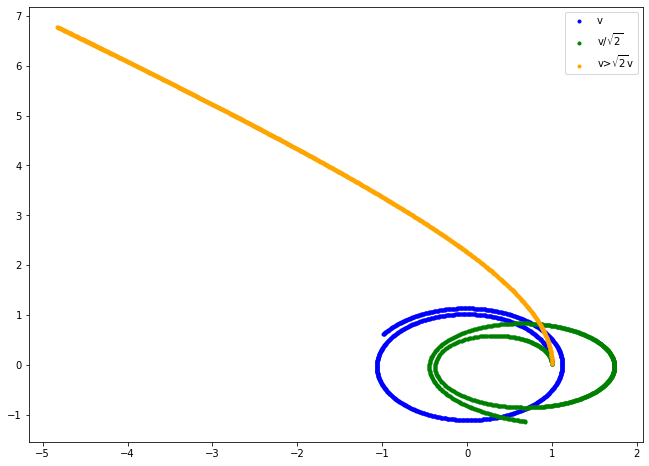

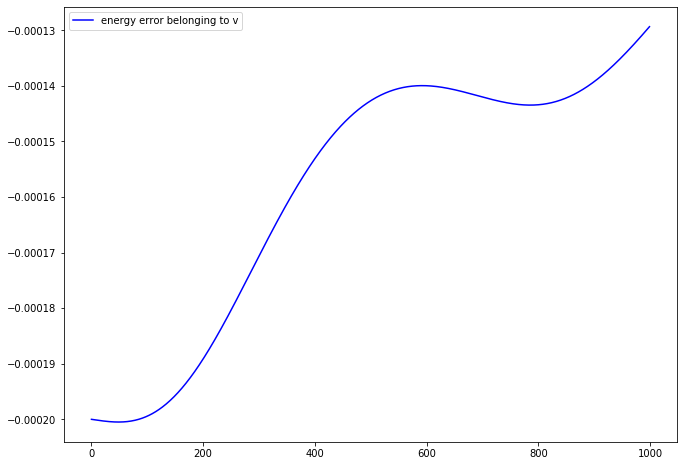

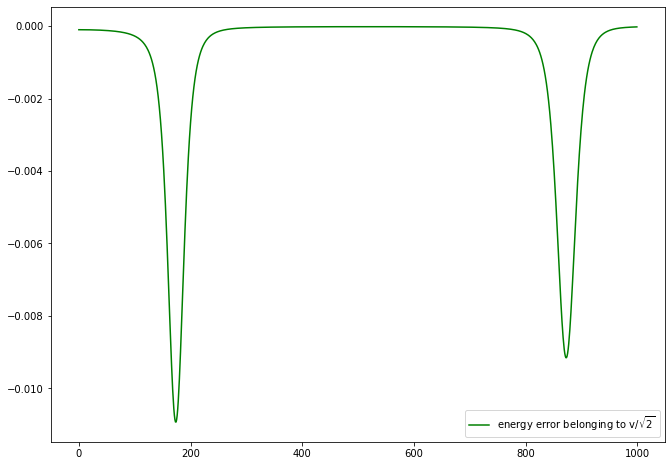

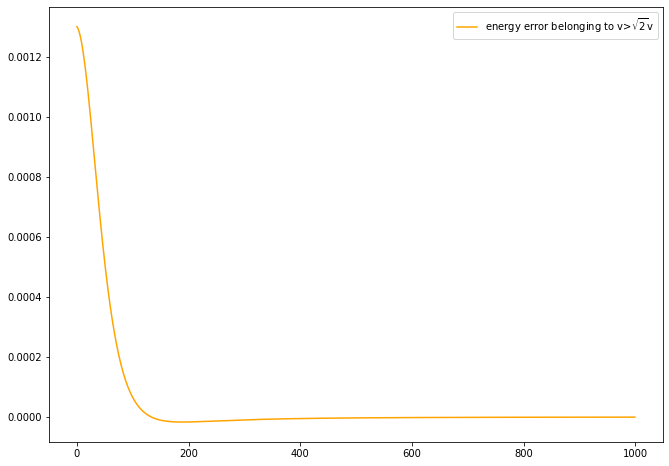

In [35]:
#look at the energy
def energy(w,s):
    return norm(w)**2/2 - 1/norm(s)

def energyerror(energy,E0): #this is the relative energy error
    return (np.abs(energy)-np.abs(E0))/np.abs(E0)


#this are the variables you put in:
r = np.array([1,0]) #relative distance vector
v = np.array([0,1]) #velocity

g = 1 
m = 1 

#normalise the velocity and the distance vector according to the script
s0 = r/norm(r) #dimensionless distance vector
v0 = np.sqrt(g*m/norm(r)) #factor to turn the velocity into a dimensionless one
w0 = v/v0 #dimensionless velocity

#turn a 2D-vector into two lists to make it plot-able with scatter
def vector_to_list(List):
    x_list = []
    y_list = []
    for i in List:
        x_list.append(i[0])
        y_list.append(i[1])
    return x_list, y_list


#implement a "forward Euler" function (including a calculation of the energy and its error)
def forwardEuler(s0,w0,h,steps):
    S = [] #create lists to save data
    W = []
    E = []
    E_error = []
    for i in range(steps):
        s_i = s0+w0*h
        w_i = w0-(s0/norm(s0)**3)*h
        e = np.abs(energy(w_i,s_i))
        e_error = energyerror(e,energy(w0,s0))
        S.append(s_i)
        W.append(w_i)
        E.append(e)
        E_error.append(e_error)
        s0 = s_i
        w0 = w_i
    x_s, y_s = vector_to_list(S)
    return x_s,y_s,W,E,E_error

#examples
x_s, y_s, W, E, dE = forwardEuler(s0,w0,0.01,1000) #circular movement
x_s2,y_s2, W2, E2, dE2 = forwardEuler(s0,w0/np.sqrt(2),0.01,1000)
x_s3,y_s3, W3, E3, dE3 = forwardEuler(s0,1.5*w0,0.01,1000)
#print(np.abs(E-E[0]/E[0]))
print((E[0]-E[0])/E[0])

#plot of the Euler scheme
plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, marker=".", label='v',color='blue')
plt.scatter(x_s2, y_s2, marker=".",label='v/$\sqrt{2}$',color='green')
plt.scatter(x_s3,y_s3, marker='.', label='v>$\sqrt{2}$v',color='orange')
plt.legend()

#plot of the energie errors
x = np.arange(0,1000,1)

plt.figure(figsize=(11,8)) #example1
plt.plot(x, dE,label='energy error belonging to v',color='blue')
plt.legend()

plt.figure(figsize=(11,8)) #example2
plt.plot(x,dE2,label='energy error belonging to v/$\sqrt{2}$',color='green')
plt.legend()

plt.figure(figsize=(11,8)) #example3
plt.plot(x,dE3,label='energy error belonging to v>$\sqrt{2}$v',color='orange')
plt.legend()

In [4]:
#the velocity vector has to be orthogonal to the distance vector to perform a circular movement
def orthogonal(a):
    b = []
    b.append(a[1])
    b.append(-a[0])
    return(b)

def w_circular(r):
    return orthogonal(r)/v0

w_circular([0,1])

array([1., 0.])

In [5]:
x_s, y_s, W, E, dE = forwardEuler(s0,w0,0.01,1000)


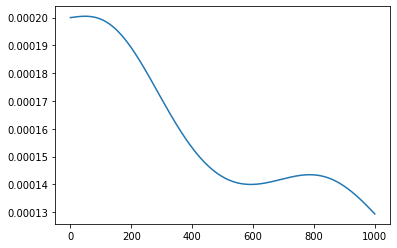

In [9]:
plt.plot(np.linspace(0, 1000, len(E)), d)

In [14]:
def rel(E):
    rel_E = []
    for e in E:
        rel_e = np.abs((e-E[0])/E[0])
        rel_E.append(rel_e)
    return rel_E

In [15]:
rel(E)

[0.0,
 0.00020000750437561998,
 0.0003999900042518342,
 0.0005999474828882385,
 0.0007998799100696216,
 0.0009997872421148486,
 0.0011996694218977372,
 0.0013995263788623823,
 0.0015993580290431435,
 0.001799164275083967,
 0.001998945006259262,
 0.0021987000984985527,
 0.0023984294144115746,
 0.002598132803312037,
 0.0027978101012476066,
 0.0029974611310274444,
 0.0031970857022513015,
 0.0033966836113452745,
 0.003596254641592898,
 0.0037957985631693458,
 0.00399531513318163,
 0.004194804095700581,
 0.004394265181808154,
 0.004593698109631405,
 0.004793102584391799,
 0.00499247829844363,
 0.005191824931323987,
 0.005391142149799178,
 0.005590429607913139,
 0.005789686947038296,
 0.005988913795929087,
 0.006188109770775262,
 0.006387274475256964,
 0.006586407500601585,
 0.006785508425645056,
 0.006984576816887819,
 0.007183612228560786,
 0.00738261420268908,
 0.007581582269153327,
 0.007780515945761175,
 0.00797941473831347,
 0.008178278140674221,
 0.008377105634845436,
 0.0085758966910

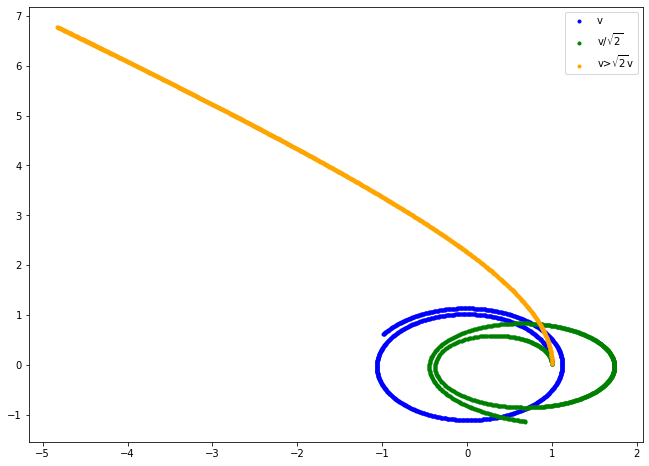

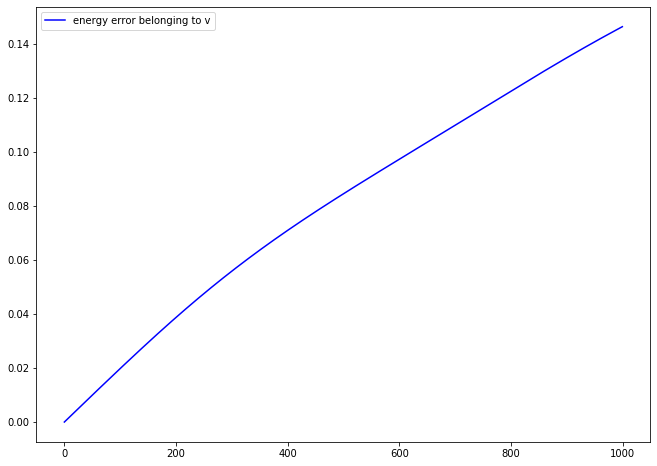

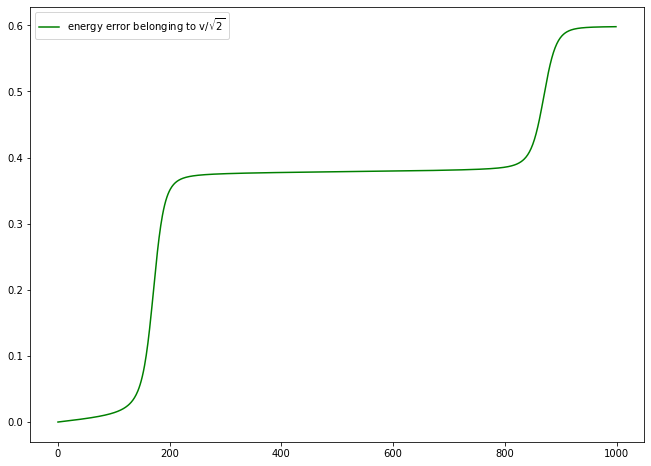

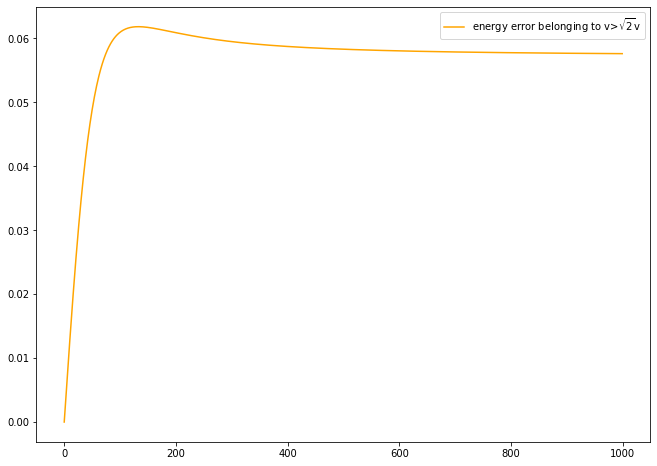

In [32]:
#look at the energy
def energy(w,s):
    return norm(w)**2/2 - 1/norm(s)

def energyerror(E): #this is the relative energy error
    rel_E = []
    for e in E:
        rel_e = np.abs((e-E[0])/E[0])
        rel_E.append(rel_e)
    return rel_E


#this are the variables you put in:
r = np.array([1,0]) #relative distance vector
v = np.array([0,1]) #velocity

g = 1 
m = 1 

#normalise the velocity and the distance vector according to the script
s0 = r/norm(r) #dimensionless distance vector
v0 = np.sqrt(g*m/norm(r)) #factor to turn the velocity into a dimensionless one
w0 = v/v0 #dimensionless velocity

#turn a 2D-vector into two lists to make it plot-able with scatter
def vector_to_list(List):
    x_list = []
    y_list = []
    for i in List:
        x_list.append(i[0])
        y_list.append(i[1])
    return x_list, y_list


#implement a "forward Euler" function (including a calculation of the energy and its error)
def forwardEuler(s0,w0,h,steps):
    S = [] #create lists to save data
    W = []
    E = []
    E_error = []
    for i in range(steps):
        s_i = s0+w0*h
        w_i = w0-(s0/norm(s0)**3)*h
        e = energy(w_i,s_i)
        S.append(s_i)
        W.append(w_i)
        E.append(e)
        s0 = s_i
        w0 = w_i
    x_s, y_s = vector_to_list(S)
    E_error = energyerror(E)
    return x_s,y_s,W,E,E_error

#examples
x_s, y_s, W, E, dE = forwardEuler(s0,w0,0.01,1000) #circular movement
x_s2,y_s2, W2, E2, dE2 = forwardEuler(s0,w0/np.sqrt(2),0.01,1000)
x_s3,y_s3, W3, E3, dE3 = forwardEuler(s0,1.5*w0,0.01,1000)

#plot of the Euler scheme
plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, marker=".", label='v',color='blue')
plt.scatter(x_s2, y_s2, marker=".",label='v/$\sqrt{2}$',color='green')
plt.scatter(x_s3,y_s3, marker='.', label='v>$\sqrt{2}$v',color='orange')
plt.legend()

#plot of the energie errors
x = np.arange(0,1000,1)

plt.figure(figsize=(11,8)) #example1
plt.plot(x, dE,label='energy error belonging to v',color='blue')
plt.legend()

plt.figure(figsize=(11,8)) #example2
plt.plot(x,dE2,label='energy error belonging to v/$\sqrt{2}$',color='green')
plt.legend()

plt.figure(figsize=(11,8)) #example3
plt.plot(x,dE3,label='energy error belonging to v>$\sqrt{2}$v',color='orange')
plt.legend()